In [2]:
import torch
import torchvision
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
%matplotlib inline
import os 
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.style as style 
import matplotlib.pyplot as plt
import matplotlib
style.use('seaborn-whitegrid')
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_context('paper',font_scale=1.75) 

In [4]:
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'

### Load MNIST Fashion

In [28]:
# https://github.com/zalandoresearch/fashion-mnist
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=False, transform=transform)
batch_size = 100
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, 
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, 
                                          shuffle=False, num_workers=2)

In [29]:
len(trainset),len(testset)

(60000, 10000)

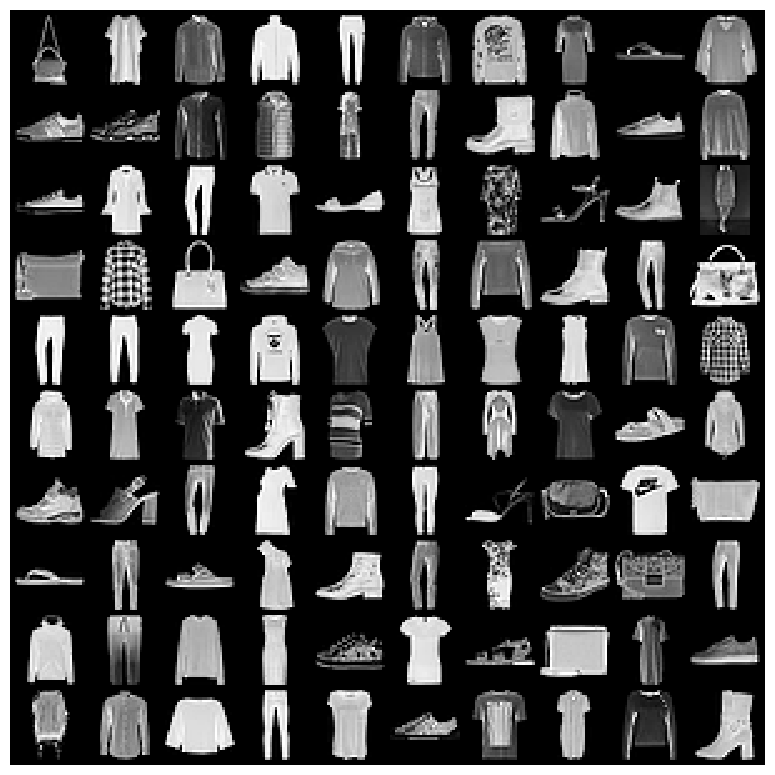

In [30]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
images = images[:100,:,:,:]
images = images / 2 + 0.5
plt.figure(figsize=(10,10),dpi=100)
plt.imshow(np.transpose(torchvision.utils.make_grid(images,nrow=10).numpy(),(1,2,0)))
plt.axis('off')
plt.show()

### true labels - random labels - shuffle pixels - random pixels - gaussion

In [ ]:
python main.py --model alexnet --noise true_label --gpu 8 --num_epochs 100 &
python main.py --model vgg16 --noise true_label --gpu 8 --num_epochs 100 &
python main.py --model resnet18 --noise true_label --gpu 8 --num_epochs 100 &

python main.py --model alexnet --noise random_label --gpu 7 --num_epochs 100 &
python main.py --model vgg16 --noise random_label --gpu 7 --num_epochs 100 &
python main.py --model resnet18 --noise random_label --gpu 7 --num_epochs 100 &

python main.py --model alexnet --noise random_pixel --gpu 6 --num_epochs 100 &
python main.py --model vgg16 --noise random_pixel --gpu 6 --num_epochs 100 &
python main.py --model resnet18 --noise random_pixel --gpu 6 --num_epochs 100 &

### weight decay - dropout

In [ ]:
python main.py --model alexnet --noise true_label --gpu 5 --num_epochs 100 --no_regu &
python main.py --model vgg16 --noise true_label --gpu 5 --num_epochs 100 --no_regu &
python main.py --model resnet18 --noise true_label --gpu 5 --num_epochs 100 --no_regu &

### Load CIFAR10 data

In [31]:
transform = transforms.Compose(
            [transforms.Resize((224, 224),interpolation=2),
             transforms.ToTensor(),
             transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./cifar10', train=True,download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100,
                                                  shuffle=True, num_workers=2)
len(trainset)

50000

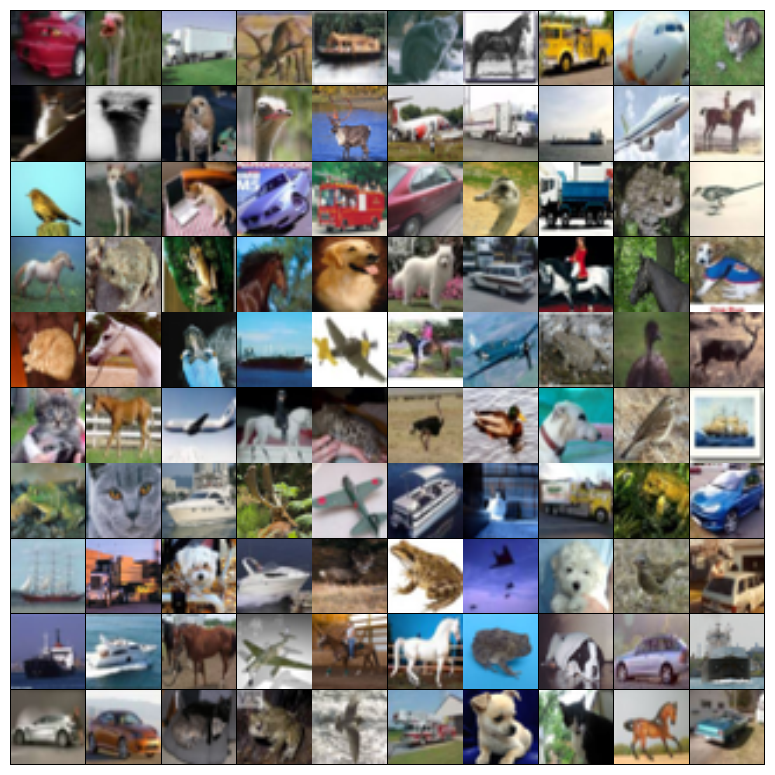

In [32]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
images = images[:100,:,:,:]
images = images / 2 + 0.5
plt.figure(figsize=(10,10),dpi=100)
plt.imshow(np.transpose(torchvision.utils.make_grid(images,nrow=10).numpy(),(1,2,0)))
plt.axis('off')
plt.show()

In [ ]:
python main.py --model alexnet --noise true_label --gpu 1 --data cifar10 --num_epochs 100 &
python main.py --model vgg16 --noise true_label --gpu 1 --data cifar10 --num_epochs 100 &
python main.py --model resnet18 --noise true_label --gpu 1 --data cifar10 --num_epochs 100 &

python main.py --model alexnet --noise random_label --gpu 2 --data cifar10 --num_epochs 100 &
python main.py --model vgg16 --noise random_label --gpu 2 --data cifar10 --num_epochs 100 &
python main.py --model resnet18 --noise random_label --gpu 2 --data cifar10 --num_epochs 100 &

python main.py --model alexnet --noise random_pixel --gpu 4 --data cifar10 --num_epochs 100 &
python main.py --model vgg16 --noise random_pixel --gpu 4 --data cifar10 --num_epochs 100 &
python main.py --model resnet18 --noise random_pixel --gpu 4 --data cifar10 --num_epochs 100 &

### Result Visualize

In [44]:
# figure 1
models = ['alexnet','vgg16','resnet18']
noises = ['true_label','random_label','random_pixel']
datas = ['mnist_fashion','cifar10']

In [93]:
lc_alexnet = np.zeros((3,100))
for n in range(len(noises)):
    lc_alexnet[n] = np.loadtxt('train_'+models[0]+'_'+noises[n]+'_Regu_'+datas[0]+'.txt',usecols=(1))
lc_vgg16 = np.zeros((3,100))
for n in range(len(noises)):
    lc_vgg16[n] = np.loadtxt('train_'+models[1]+'_'+noises[n]+'_Regu_'+datas[0]+'.txt',usecols=(1))
lc_resnet18 = np.zeros((3,100))
for n in range(len(noises)):
    lc_resnet18[n] = np.loadtxt('train_'+models[2]+'_'+noises[n]+'_Regu_'+datas[0]+'.txt',usecols=(1))
    
lc_alexnet_cifar = np.zeros((3,100))
for n in range(len(noises)):
    lc_alexnet_cifar[n] = np.loadtxt('train_'+models[0]+'_'+noises[n]+'_Regu_'+datas[1]+'.txt',usecols=(1))
lc_vgg16_cifar = np.zeros((3,100))
for n in range(len(noises)):
    lc_vgg16_cifar[n] = np.loadtxt('train_'+models[1]+'_'+noises[n]+'_Regu_'+datas[1]+'.txt',usecols=(1))
lc_resnet18_cifar = np.zeros((3,100))
for n in range(len(noises)):
    lc_resnet18_cifar[n] = np.loadtxt('train_'+models[2]+'_'+noises[n]+'_Regu_'+datas[1]+'.txt',usecols=(1))

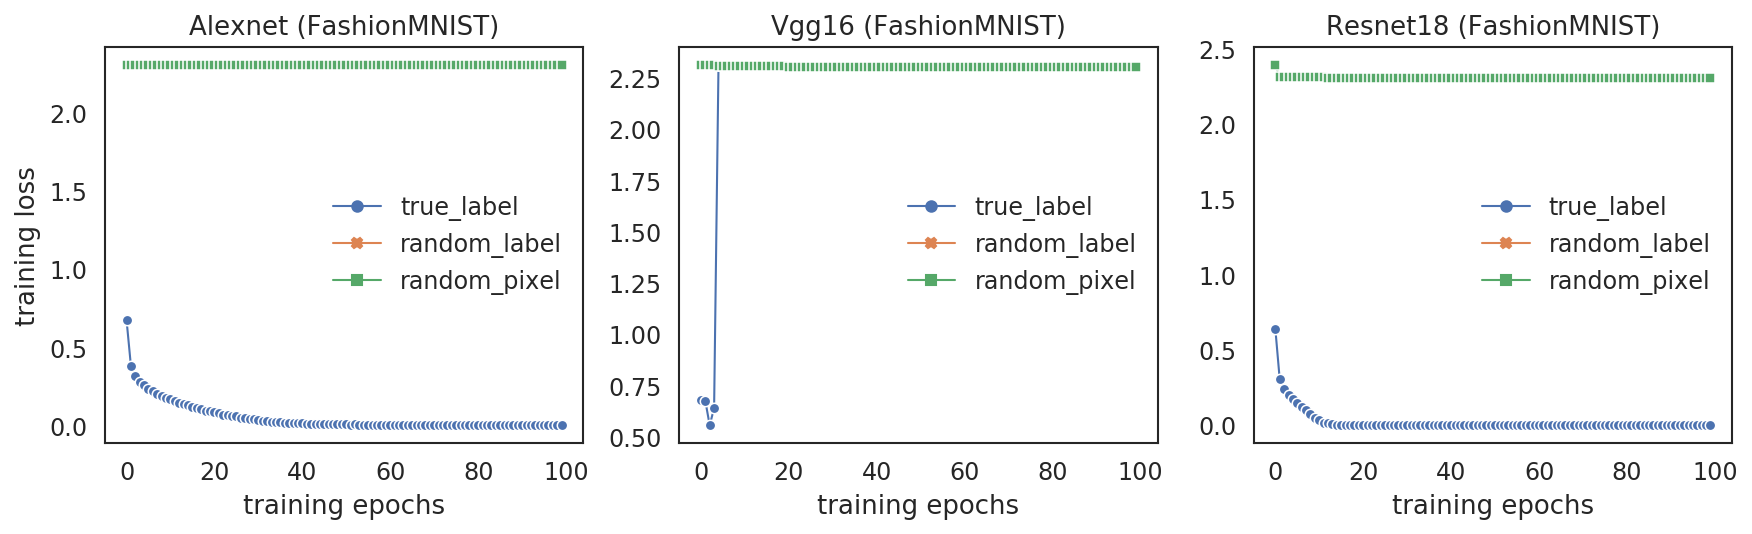

In [105]:
sns.set(style="white")                                                 
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 5}                  
sns.set_context("paper", rc = paper_rc, font_scale=1.3)  
plt.figure(figsize=(14,3.5),dpi=150)
plt.subplot(131)
ax = sns.lineplot(data=pd.DataFrame(lc_alexnet.T,columns=noises),markers=True,dashes=False)
plt.xlabel('training epochs')
plt.ylabel('training loss')
plt.legend(loc='center right')
plt.title('Alexnet (FashionMNIST)')
plt.subplot(132)
ax = sns.lineplot(data=pd.DataFrame(lc_vgg16.T,columns=noises),markers=True,dashes=False)
plt.xlabel('training epochs')
plt.legend(loc='center right')
plt.title('Vgg16 (FashionMNIST)')
plt.subplot(133)
ax = sns.lineplot(data=pd.DataFrame(lc_resnet18.T,columns=noises),markers=True,dashes=False)
plt.xlabel('training epochs')
plt.legend(loc='center right')
plt.title('Resnet18 (FashionMNIST)')
plt.show()

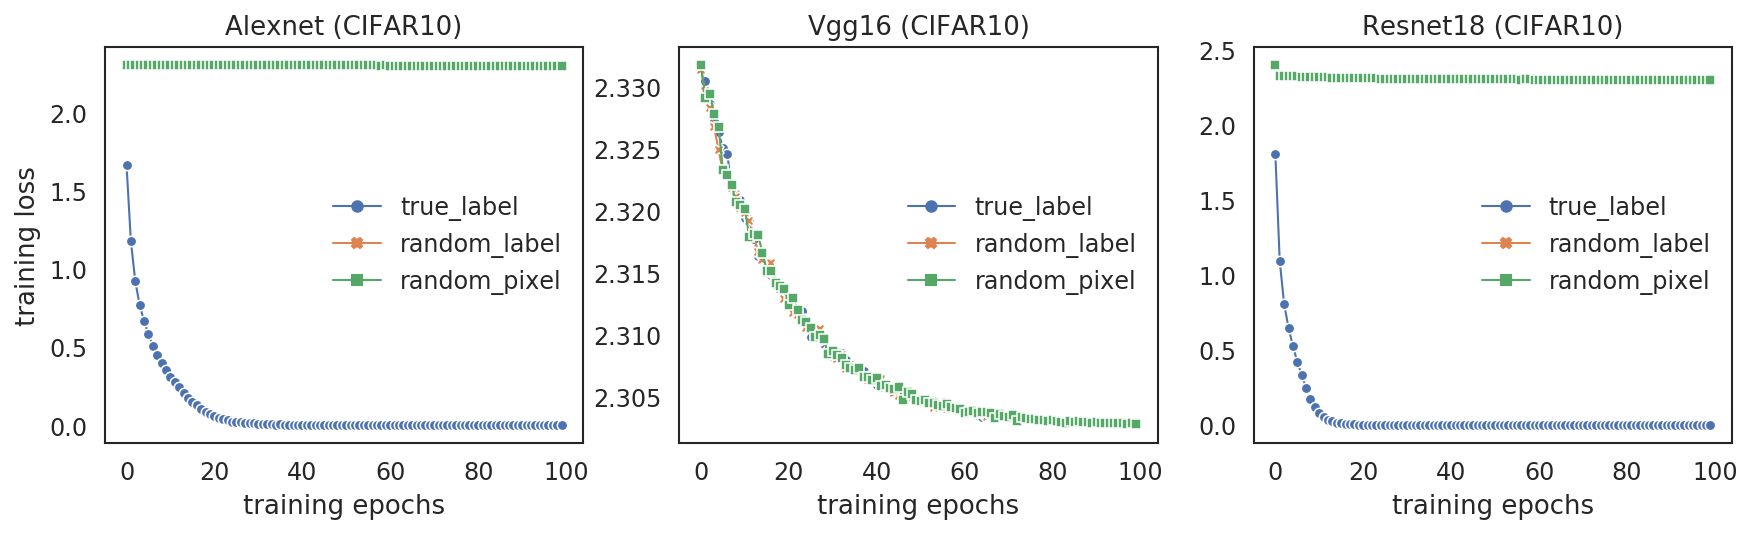

In [107]:
sns.set(style="white")                                                 
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 5}                  
sns.set_context("paper", rc = paper_rc, font_scale=1.3)  
plt.figure(figsize=(14,3.5),dpi=150)
plt.subplot(131)
ax = sns.lineplot(data=pd.DataFrame(lc_alexnet_cifar.T,columns=noises),markers=True,dashes=False)
plt.xlabel('training epochs')
plt.legend(loc='center right')
plt.title('Alexnet (CIFAR10)')
plt.ylabel('training loss')
plt.subplot(132)
ax = sns.lineplot(data=pd.DataFrame(lc_vgg16_cifar.T,columns=noises),markers=True,dashes=False)
plt.xlabel('training epochs')
plt.legend(loc='center right')
plt.title('Vgg16 (CIFAR10)')
plt.subplot(133)
ax = sns.lineplot(data=pd.DataFrame(lc_resnet18_cifar.T,columns=noises),markers=True,dashes=False)
plt.xlabel('training epochs')
plt.legend(loc='center right')
plt.title('Resnet18 (CIFAR10)')
plt.show()

In [123]:
acc_alexnet = np.zeros((4,100))
acc_alexnet[:2,:] = np.loadtxt('train_'+models[0]+'_'+noises[0]+'_Regu_'+datas[0]+'.txt',usecols=(2,4)).T
acc_alexnet[2:,:] = np.loadtxt('train_'+models[0]+'_'+noises[0]+'_noRegu_'+datas[0]+'.txt',usecols=(2,4)).T

acc_vgg = np.zeros((4,100))
acc_vgg[:2,:] = np.loadtxt('train_'+models[1]+'_'+noises[0]+'_Regu_'+datas[0]+'.txt',usecols=(2,4)).T
acc_vgg[2:,:] = np.loadtxt('train_'+models[1]+'_'+noises[0]+'_noRegu_'+datas[0]+'.txt',usecols=(2,4)).T

acc_resnet = np.zeros((4,100))
acc_resnet[:2,:] = np.loadtxt('train_'+models[2]+'_'+noises[0]+'_Regu_'+datas[0]+'.txt',usecols=(2,4)).T
acc_resnet[2:,:] = np.loadtxt('train_'+models[2]+'_'+noises[0]+'_noRegu_'+datas[0]+'.txt',usecols=(2,4)).T

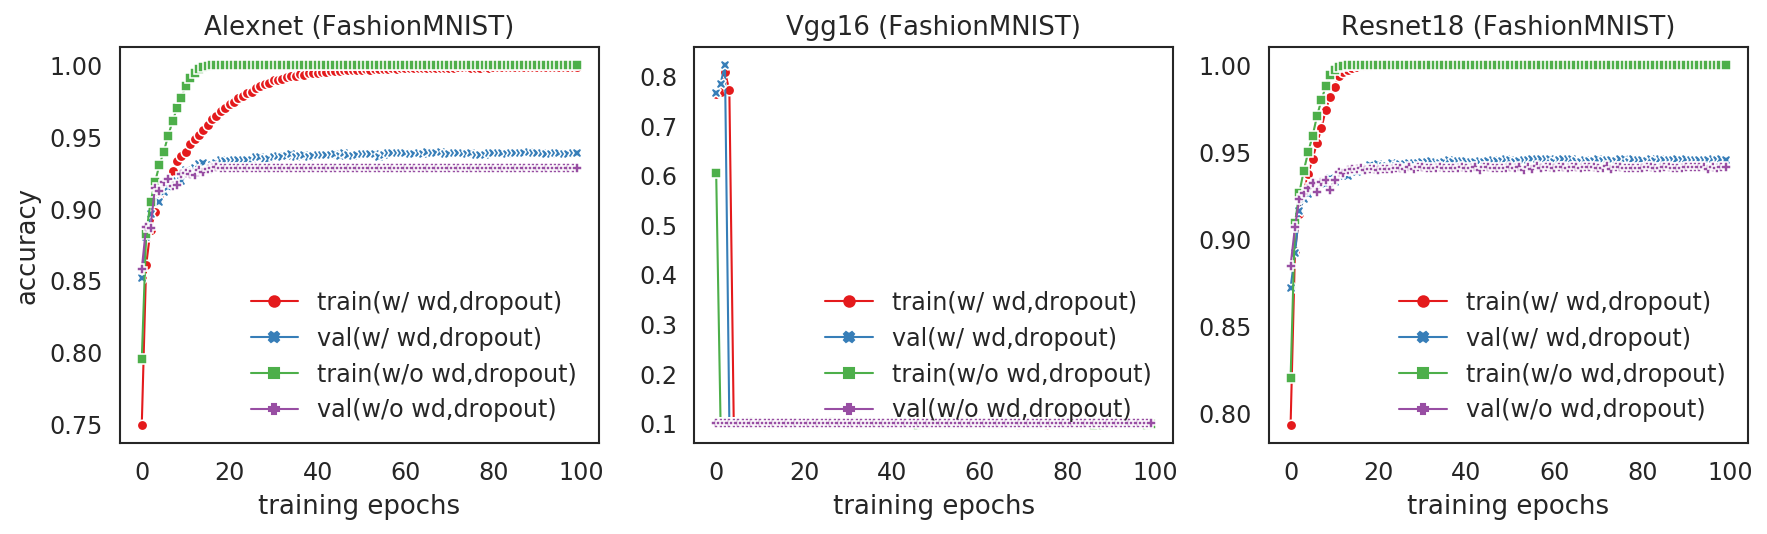

In [144]:
sns.set(style="white")                                                 
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 5}                  
sns.set_context("paper", rc = paper_rc, font_scale=1.3)  
plt.figure(figsize=(14,3.5),dpi=150)

plt.subplot(131)
ax = sns.lineplot(data=pd.DataFrame(acc_alexnet.T,columns=['train(w/ wd,dropout)','val(w/ wd,dropout)',
                                        'train(w/o wd,dropout)','val(w/o wd,dropout)']),
                                        markers=True,dashes=False,palette='Set1')
plt.xlabel('training epochs')
plt.legend(loc='lower right')
plt.title('Alexnet (FashionMNIST)')
plt.ylabel('accuracy')

plt.subplot(132)
ax = sns.lineplot(data=pd.DataFrame(acc_vgg.T,columns=['train(w/ wd,dropout)','val(w/ wd,dropout)',
                                        'train(w/o wd,dropout)','val(w/o wd,dropout)']),
                  markers=True,dashes=False,palette='Set1')
plt.xlabel('training epochs')
plt.legend(loc='lower right')
plt.title('Vgg16 (FashionMNIST)')

plt.subplot(133)
ax = sns.lineplot(data=pd.DataFrame(acc_resnet.T,columns=['train(w/ wd,dropout)','val(w/ wd,dropout)',
                                        'train(w/o wd,dropout)','val(w/o wd,dropout)']),
                  markers=True,dashes=False,palette='Set1')
plt.xlabel('training epochs')
plt.legend(loc='lower right')
plt.title('Resnet18 (FashionMNIST)')
plt.show()